In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [7]:
data = pd.read_csv("/content/drive/MyDrive/fraud.csv")
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


['url-1.htm', 'Classroom', 'ReasoningVerbal&NonVerbal (1).pdf', 'vaccine certificate.pdf', 'project (1).pdf', 'Colab Notebooks', 'test.csv', 'train.csv', 'all_data_copy.csv', 'Sales_Data', 'photo.jpg', 'Sukanya Mukherjee Resume.pdf', 'fraud.csv']


Mounted at /content/drive


In [8]:
data.isnull().sum()


step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [9]:
data['type'].unique()


array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [10]:
dict = {'CASH_OUT':1, 'PAYMENT':2, 'CASH_IN':3, 'TRANSFER':4, 'DEBIT':5}
data['type'] = data['type'].map(dict)


In [11]:
data.head()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,2,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,2,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,4,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,2,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [12]:
data.describe()


,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,2.055307e+00,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,9.808966e-01,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.000000e+00,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,2.000000e+00,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,3.000000e+00,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,5.000000e+00,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


Data Cleaning



In [13]:
data.drop(['step','isFlaggedFraud'], axis=1, inplace=True)


In [14]:
data.drop(['nameOrig','nameDest'], axis=1, inplace=True)


In [15]:
data.head()


,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,2,9839.64,170136.0,160296.36,0.0,0.0,0
1,2,1864.28,21249.0,19384.72,0.0,0.0,0
2,4,181.00,181.0,0.00,0.0,0.0,1
3,1,181.00,181.0,0.00,21182.0,0.0,1
4,2,11668.14,41554.0,29885.86,0.0,0.0,0


Outliers

Since dataset is imbalance removing outliers may remove the required data considering that we have not removed the outliers and performed the undersampling in further process.



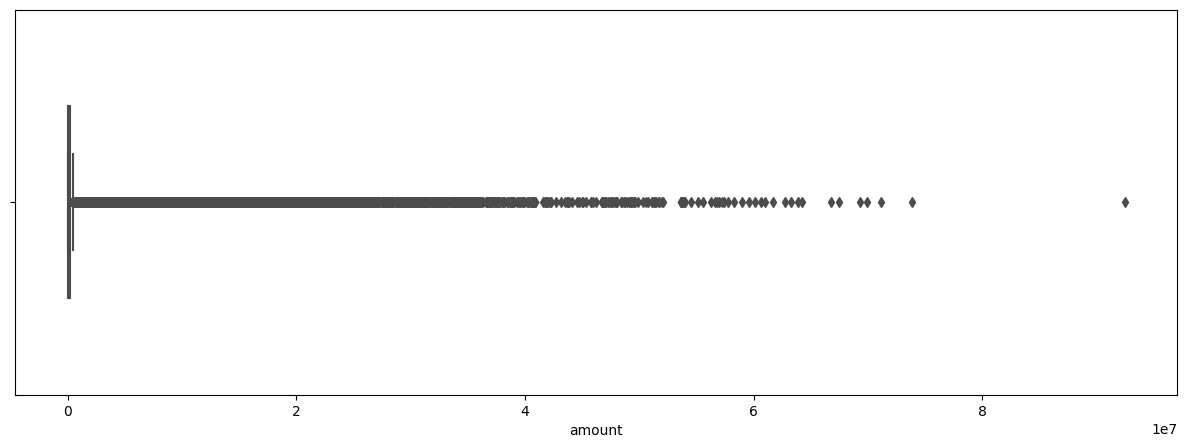

In [16]:
plt.figure(figsize=(15,5))
sns.boxplot(x=data.amount, color='blue', width=0.5);


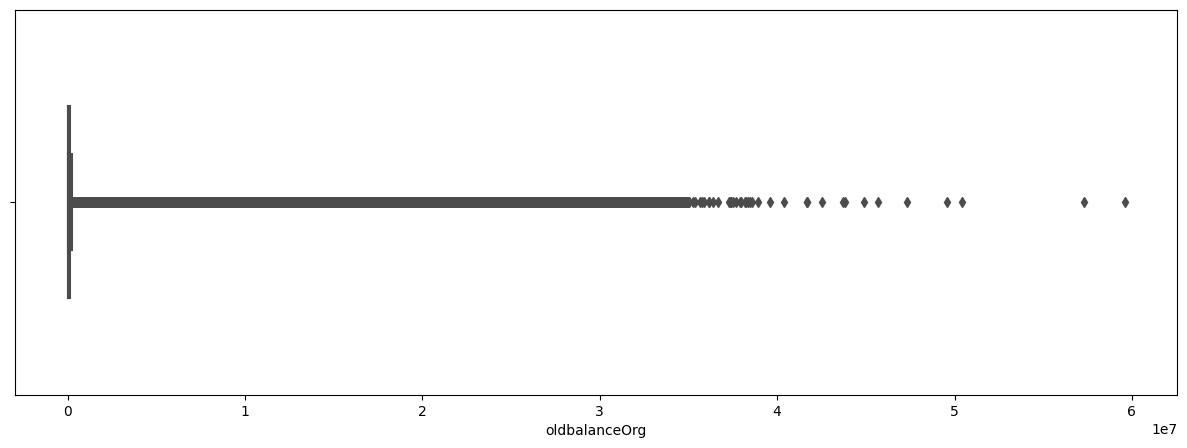

In [17]:
plt.figure(figsize=(15,5))
sns.boxplot(x=data.oldbalanceOrg, color='blue', width=0.5);


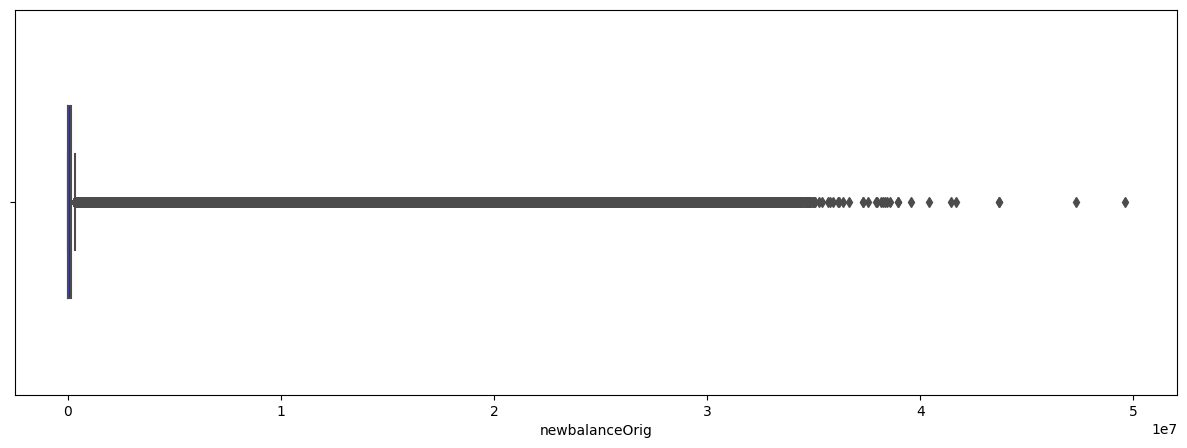

In [18]:
plt.figure(figsize=(15,5))
sns.boxplot(x=data.newbalanceOrig, color='blue', width=0.5);

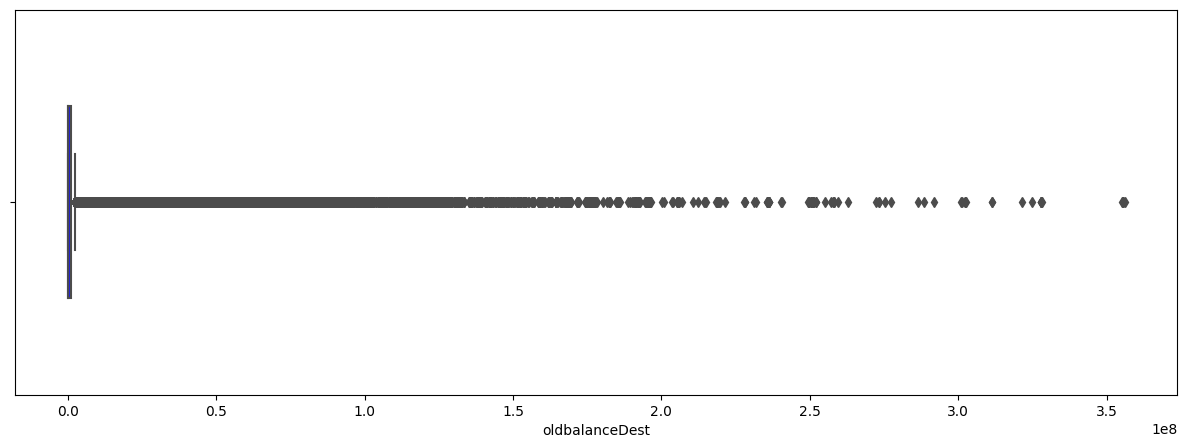

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(x=data.oldbalanceDest, color='blue', width=0.5);

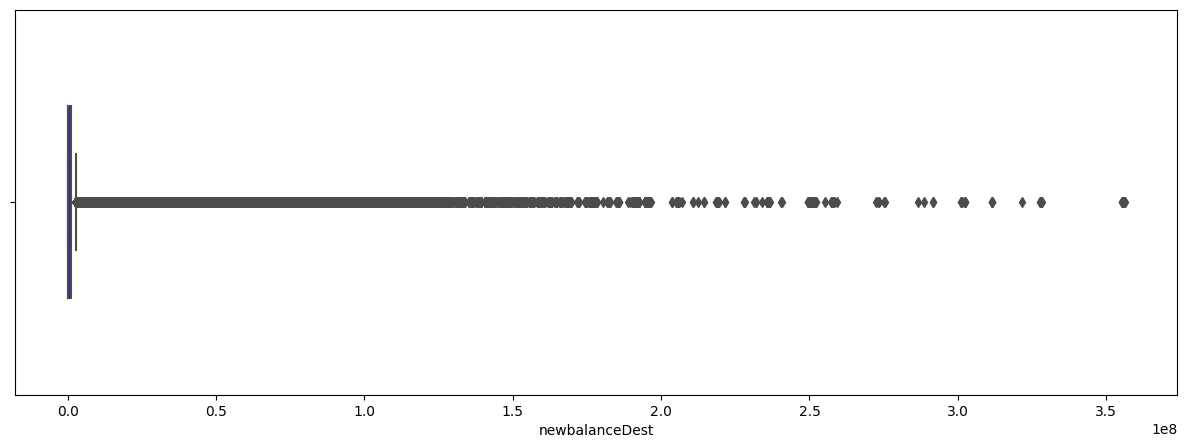

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(x=data.newbalanceDest, color='blue', width=0.5);


**From above boxplots we can find that there are lots of outliers present in each features.So after dropping the outliers using IQR method,We deleted almost all fraud transactions from the dataframe. Only 26 fraud transcations remain in the entire data frame. So removing Outliers in this case is not good option.**

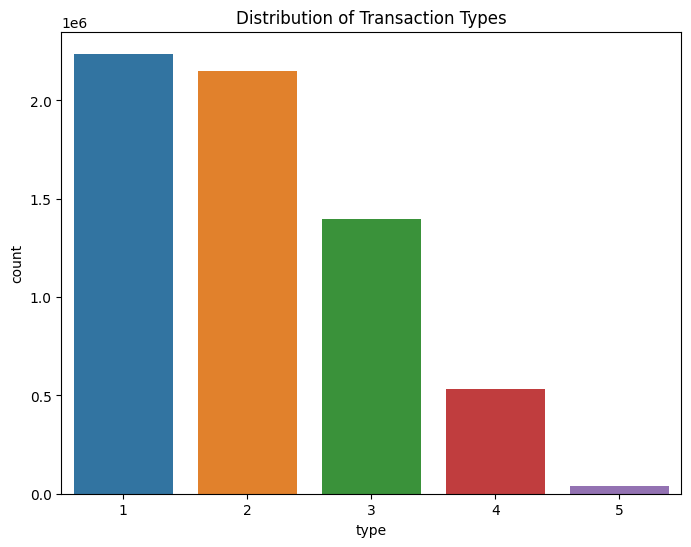

In [19]:
#Exploratory Data Analysis(EDA)
#Distribution of Transcation Types
plt.figure(figsize=(8, 6))
sns.countplot(x='type', data=data)
plt.title('Distribution of Transaction Types')
plt.show()


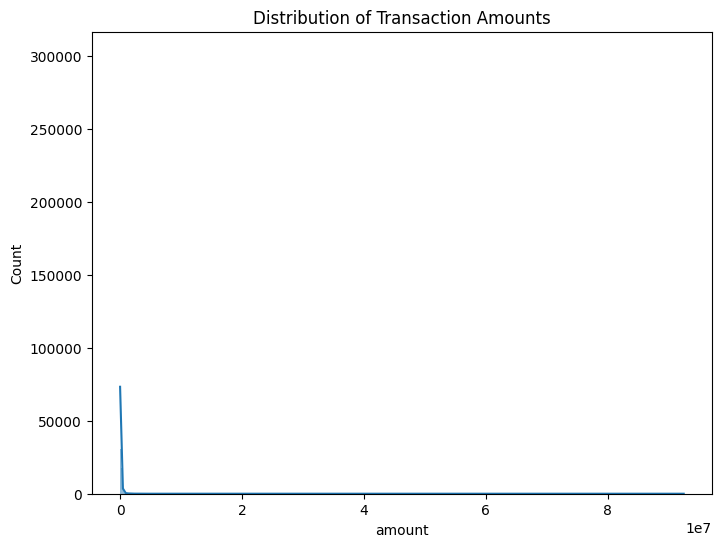

In [20]:
#Distribution of Transaction Amounts
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='amount', kde=True)
plt.title('Distribution of Transaction Amounts')
plt.show()

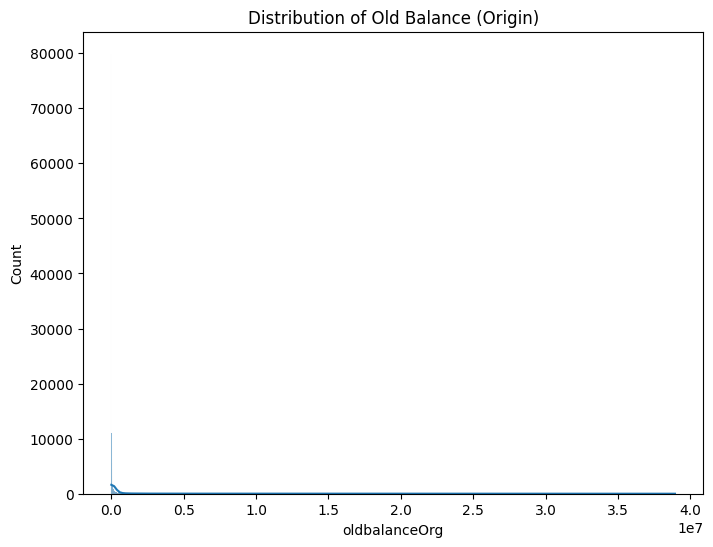

In [ ]:
#Distribution of Transcations Old Balance
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='oldbalanceOrg', kde=True)
plt.title('Distribution of Old Balance (Origin)')
plt.show()

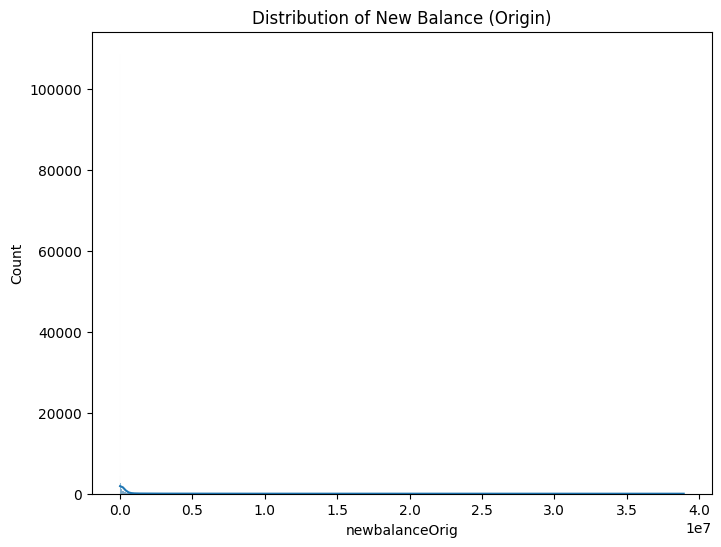

In [ ]:
#Distribution of Transcations New Balance
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='newbalanceOrig', kde=True)
plt.title('Distribution of New Balance (Origin)')
plt.show()


In [ ]:
#Distribution of Transcations Old Balance(Dest)

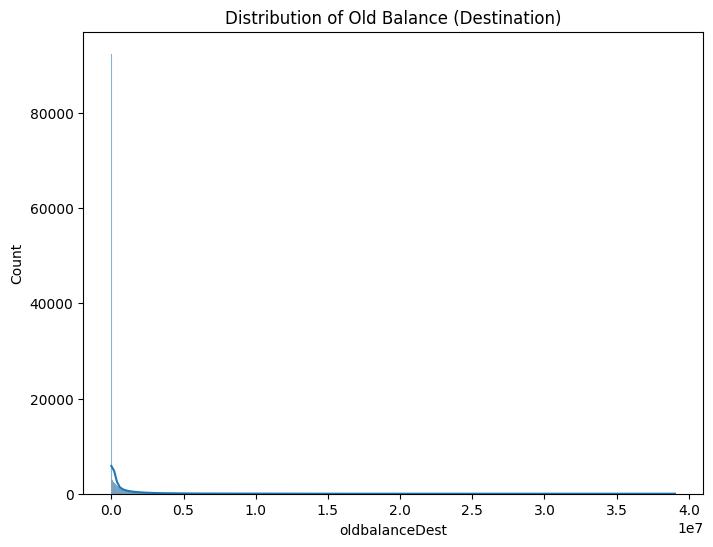

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='oldbalanceDest', kde=True)
plt.title('Distribution of Old Balance (Destination)')
plt.show()

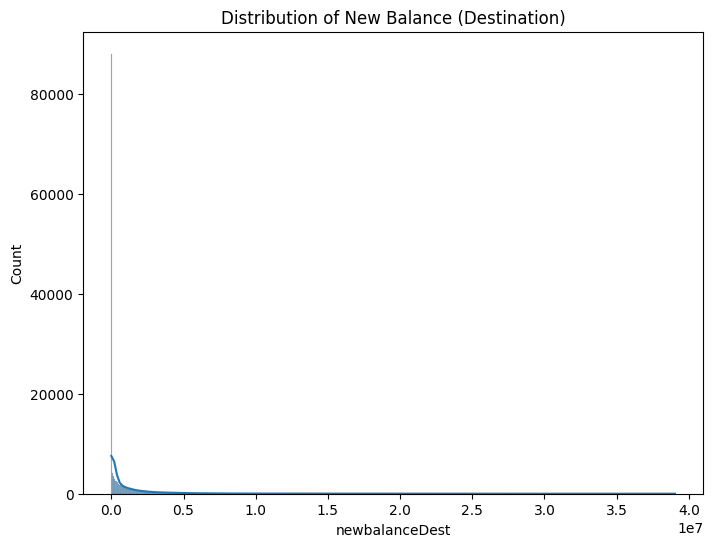

In [ ]:
#New Balnace Dest.
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='newbalanceDest', kde=True)
plt.title('Distribution of New Balance (Destination)')
plt.show()

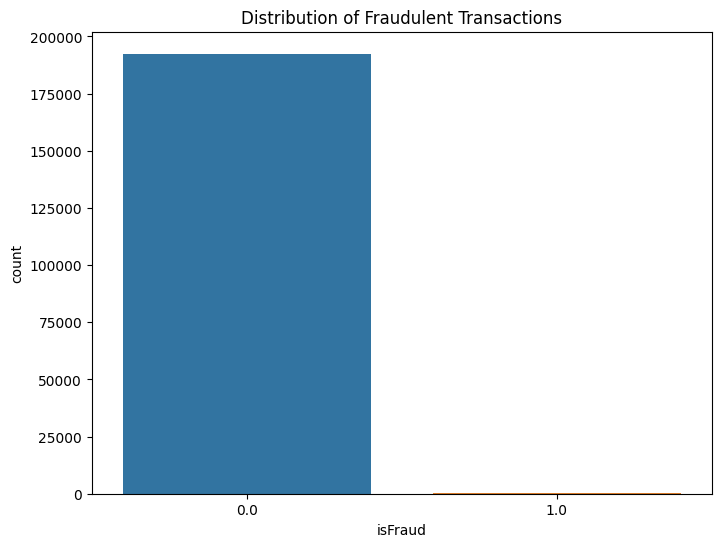

In [ ]:
#Distribution of Is Fraud
plt.figure(figsize=(8, 6))
sns.countplot(x='isFraud', data=data)
plt.title('Distribution of Fraudulent Transactions')
plt.show()

SO YOU CAN SEE THAT FRADULENT TRANSACTIONS ARE SIGNIFICANTLY LOWER THEN NORMAL TRANSACTIONS. THIS SITUATION IS CALLED HAVING AN IMBALANCED DATASET.

<Axes: >

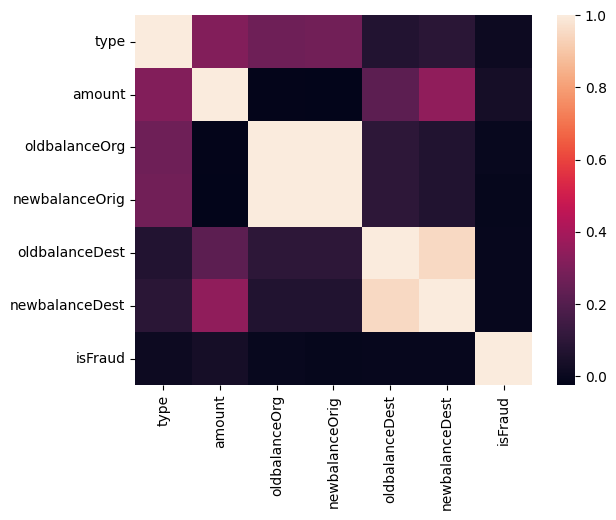

In [ ]:
#Correlation Matrix

sns.heatmap(data.corr())


Dealing With Imbalanced dataset(SMOTE)



In [21]:
#Create independent and Dependent Features
columns = data.columns.tolist()
# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ["isFraud"]]
# Store the variable we are predicting
target = "isFraud"
# Define a random state
state = np.random.RandomState(42)
X = data[columns]
Y = data[target]
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
# Print the shapes of X & Y
print(X.shape)
print(Y.shape)
Y

(6362620, 6)
(6362620,)


0          0
1          0
2          1
3          1
4          0
          ..
6362615    1
6362616    1
6362617    1
6362618    1
6362619    1
Name: isFraud, Length: 6362620, dtype: int64

In [22]:
fraud = data[data['isFraud']==1]


In [23]:
normal = data[data['isFraud']==0]


In [24]:
print(fraud.shape,normal.shape)

(8213, 7) (6354407, 7)


In [25]:
from imblearn.under_sampling import NearMiss
from imblearn.under_sampling import RandomUnderSampler


In [37]:
rus = RandomUnderSampler(random_state=42)



In [38]:
# Resample the data
X_res, y_res = rus.fit_resample(X,Y)
X_res.shape,y_res.shape


((16426, 6), (16426,))

In [39]:
import numpy as np

nan_indices = np.isnan(Y)
print("Indices with NaN target values:", np.where(nan_indices)[0])


Indices with NaN target values: []


In [40]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(Y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({0: 6354407, 1: 8213})
Resampled dataset shape Counter({0: 8213, 1: 8213})


In [41]:
X_res

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,1,183806.32,19391.00,0.00,382572.19,566378.51
1,2,521.37,0.00,0.00,0.00,0.00
2,2,3478.18,19853.00,16374.82,0.00,0.00
3,2,1716.05,5769.17,4053.13,0.00,0.00
4,3,253129.93,1328499.49,1581629.42,2713220.48,2460090.55
...,...,...,...,...,...,...
16421,1,339682.13,339682.13,0.00,0.00,339682.13
16422,4,6311409.28,6311409.28,0.00,0.00,0.00
16423,1,6311409.28,6311409.28,0.00,68488.84,6379898.11
16424,4,850002.52,850002.52,0.00,0.00,0.00


In [42]:
y_res

0        0
1        0
2        0
3        0
4        0
        ..
16421    1
16422    1
16423    1
16424    1
16425    1
Name: isFraud, Length: 16426, dtype: int64

Pie-chart of sample data



In [43]:
import plotly.graph_objects as go


In [44]:
# Assuming you have used undersampled data and stored the class counts in a dictionary
undersampled_data = {
    'Fraud': 50,
    'Normal': 50,
}


In [45]:
# Create pie chart
fig = go.Figure(data=[go.Pie(labels=list(undersampled_data.keys()), values=list(undersampled_data.values()))])
fig.update_layout(title='Undersampled Data Distribution')

fig.show()

In [46]:
#Model
#Feature Engineering

X_res=X_res[['type','amount','oldbalanceOrg','newbalanceOrig']]



In [ ]:
X_res.dtypes

type                int64
amount            float64
oldbalanceOrg     float64
newbalanceOrig    float64
dtype: object

Decision Tree



In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
xtrain,xtest,ytrain,ytest=train_test_split(X_res,y_res,test_size=0.20,random_state=42)


In [ ]:

model=DecisionTreeClassifier()

In [ ]:
model.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [ ]:
model.score(xtest,ytest)

0.992696287279367

In [ ]:
y_pred = model.predict(xtest)


In [ ]:
# Calculate the precision score
from sklearn.metrics import precision_score
precision = precision_score(ytest, y_pred)
print("Precision Score:", precision)

Precision Score: 0.9884918231374924


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier



In [ ]:
models=[]
results=[]
names=[]

In [ ]:
models.append(('LR',LogisticRegression()))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('NB',GaussianNB()))


In [ ]:
models


[('LR', LogisticRegression()),
 ('LDA', LinearDiscriminantAnalysis()),
 ('KNN', KNeighborsClassifier()),
 ('NB', GaussianNB())]

In [ ]:
from sklearn import model_selection
for name,model in models:
  kfold=model_selection.KFold(n_splits=10,random_state=7,shuffle=True)
  cv_results=model_selection.cross_val_score(model,X_res,y_res,cv=kfold,scoring='accuracy')
  results.append(cv_results)
  names.append(name)
  msg="%s: %f (%f)" %(name,cv_results.mean(),cv_results.std())
  print(msg)

LR: 0.908864 (0.006660)
LDA: 0.789114 (0.008227)
KNN: 0.990381 (0.002621)
NB: 0.646840 (0.008319)


In [ ]:
results = []
names = []

In [ ]:
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=7, shuffle=True)
    cv_results = model_selection.cross_val_predict(model, X_res, y_res, cv=kfold)

    precision = precision_score(y_res, cv_results)

    results.append(precision)
    names.append(name)
    msg = "%s: Precision=%.3f" % (name, precision)
    print(msg)

LR: Precision=0.850
LDA: Precision=0.916
KNN: Precision=0.985
NB: Precision=0.944


Comparison Between Different Models

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd

In [ ]:
# Sample data
data = {
    'Model': ['DT','LR', 'LDA', 'KNN', 'NB'],
    'Accuracy_score': [0.993000,0.908864, 0.789114, 0.990381, 0.646840],
    'Precision_score': [0.989,0.850, 0.916, 0.985, 0.944],
}

In [ ]:
df = pd.DataFrame(data)
print(df)

  Model  Accuracy_score  Precision_score
0    DT        0.993000            0.989
1    LR        0.908864            0.850
2   LDA        0.789114            0.916
3   KNN        0.990381            0.985
4    NB        0.646840            0.944


In [ ]:


# Extract values from the DataFrame
models = df['Model'].tolist()
accuracy_scores = df['Accuracy_score'].tolist()
precision_scores = df['Precision_score'].tolist()

labels = ['Accuracy_score', 'Precision_score']

fig = make_subplots(rows=1, cols=2, subplot_titles=labels)

for i in range(len(labels)):
    fig.add_trace(go.Bar(x=models, y=df[labels[i]]), row=1, col=i+1)

fig.update_layout(
    title='Comparison of Model Precision and Accuracy Scores',
    showlegend=False,
    height=600,
    width=1000
)

fig.show()